In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings; warnings.filterwarnings('ignore')

In [128]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # 원하는 한국어 폰트 파일 경로로 변경
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [129]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [130]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

In [131]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


### Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 
아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
데이터는 위에서 제공된 데이터를 사용합니다.
해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [132]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '데이터'], dtype='object')

In [133]:
# 컬럼 단위변환
column_to_convert = '데이터'
df[column_to_convert] = df[column_to_convert]

pd.options.display.float_format = '{:.2f}'.format

In [134]:
df['시점'] = pd.to_datetime(df['시점'], format='%Y.%m/%d', errors='coerce') 

df['연도'] = df['시점'].dt.year
df['분기'] = df['시점'].dt.quarter

In [135]:
graph = df.describe()

In [136]:
graph

,데이터,연도,분기
count,2772.00,2646.00,2646.00
mean,1613.12,2019.14,1.24
std,4273.43,1.52,0.43
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,1.00
75%,1181.00,2020.00,1.00
max,47689.00,2022.00,2.00


### Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [139]:
pivot = df.pivot_table(index='국가(대륙)별', columns='연도', values='데이터', aggfunc='sum')
pivot

연도,2017.00,2018.00,2019.00,2020.00,2021.00,2022.00
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,11530
대양주,18989,17520,13191,16255,16841,2643
미국,142292,156312,186617,255384,277579,51272
아세안(ASEAN),66163,76450,82930,105360,94150,18161
유럽연합(EU),31068,36826,39008,39865,32349,3647
일본,125442,178094,189330,220730,280029,71859
중국,167240,182068,210418,289446,194380,43683
중남미,10245,11669,12981,12563,8298,725
중동,8030,8019,9325,11467,6164,541


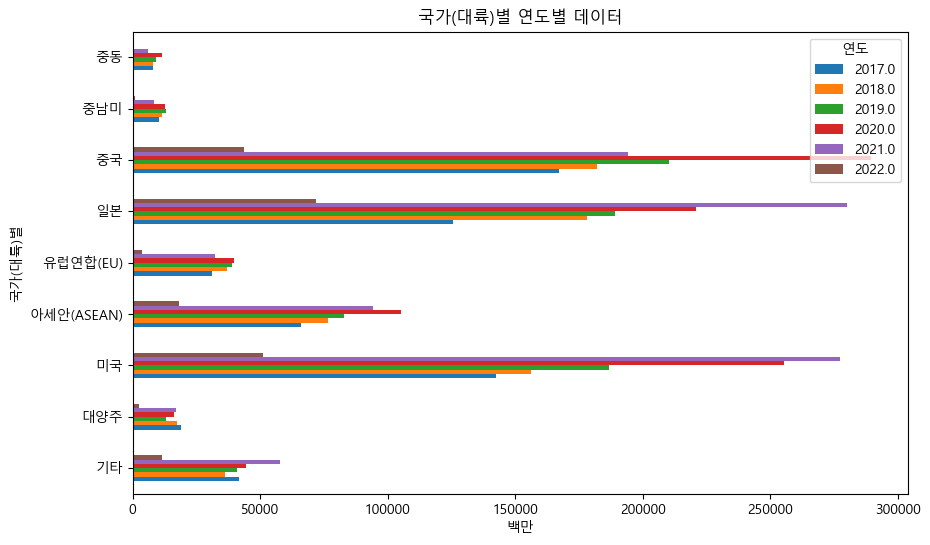

In [140]:
pivot.plot(kind='barh', figsize=(10, 6))
plt.xlabel('백만')
plt.ylabel('국가(대륙)별')
plt.title('국가(대륙)별 연도별 데이터')
plt.legend(title='연도')
plt.show()

### Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다.
또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다.
이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요!
또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [143]:
df_20 = df[df['연도'] == 2020]
grouped_20 = df_20[df_2020['연도'] == 2020].groupby(['상품군별', '국가(대륙)별'])['데이터'].sum()
grouped_20_unstacked = grouped_20.unstack()

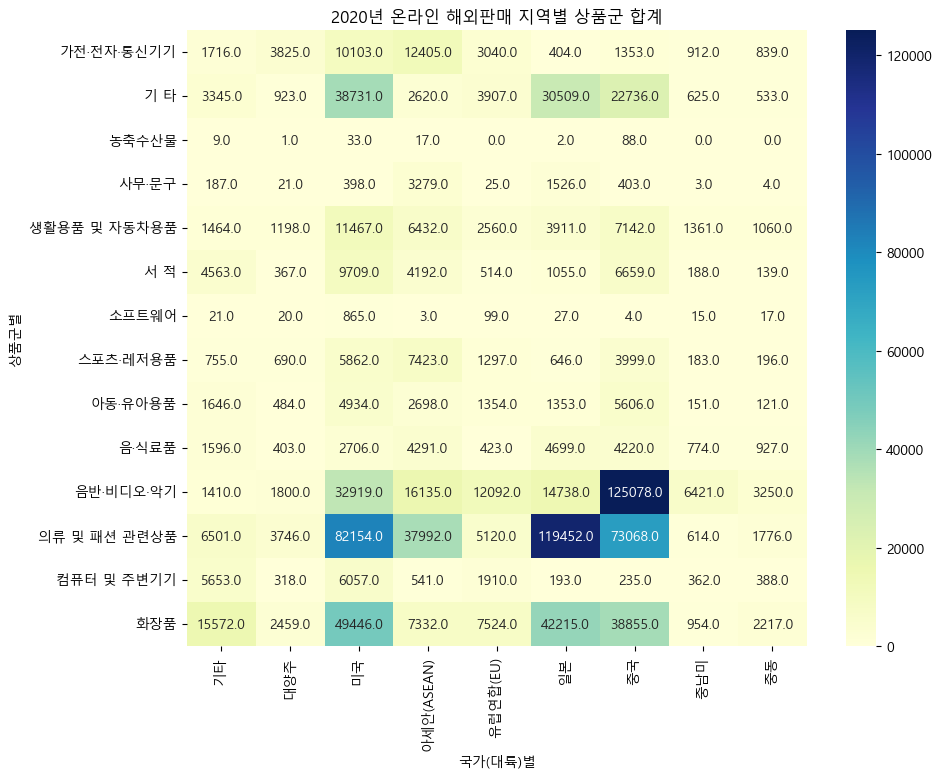

In [145]:
plt.figure(figsize=(10, 8))
plt.title('2020년 온라인 해외판매 지역별 상품군 합계')
sns.heatmap(grouped_20_unstacked, cmap='YlGnBu', annot=True, fmt=".1f", cbar=True)
plt.xlabel('국가(대륙)별')
plt.ylabel('상품군별')
plt.show()

### Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며,
주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [146]:
df_until_21 = df[df['연도'] <= 2021]

important_countries = ["미국", "중국", "일본"]
important_products = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

In [148]:
filtered_data = df_until_21[
    (df_until_21['국가(대륙)별'].isin(important_countries)) &
    (df_until_21['상품군별'].isin(important_products))
]

grouped_data = filtered_data.groupby(['연도', '국가(대륙)별', '상품군별'])['데이터'].sum().unstack()

In [153]:
df_until_21 = df[df['연도'] <= 2021]
important_countries = ["미국", "중국", "일본"]
important_products = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

filtered_data = df_until_21[
    (df_until_21['국가(대륙)별'].isin(important_countries)) &
    (df_until_21['상품군별'].isin(important_products))
]

grouped_data = filtered_data.groupby(['연도', '국가(대륙)별', '상품군별'])['데이터'].sum().unstack()

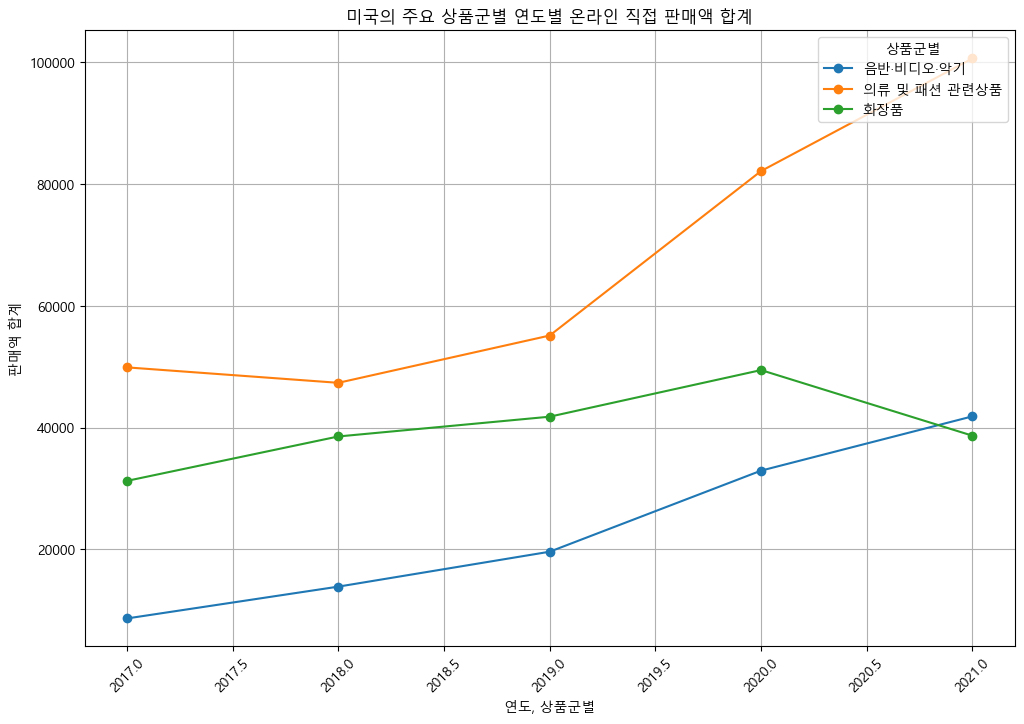

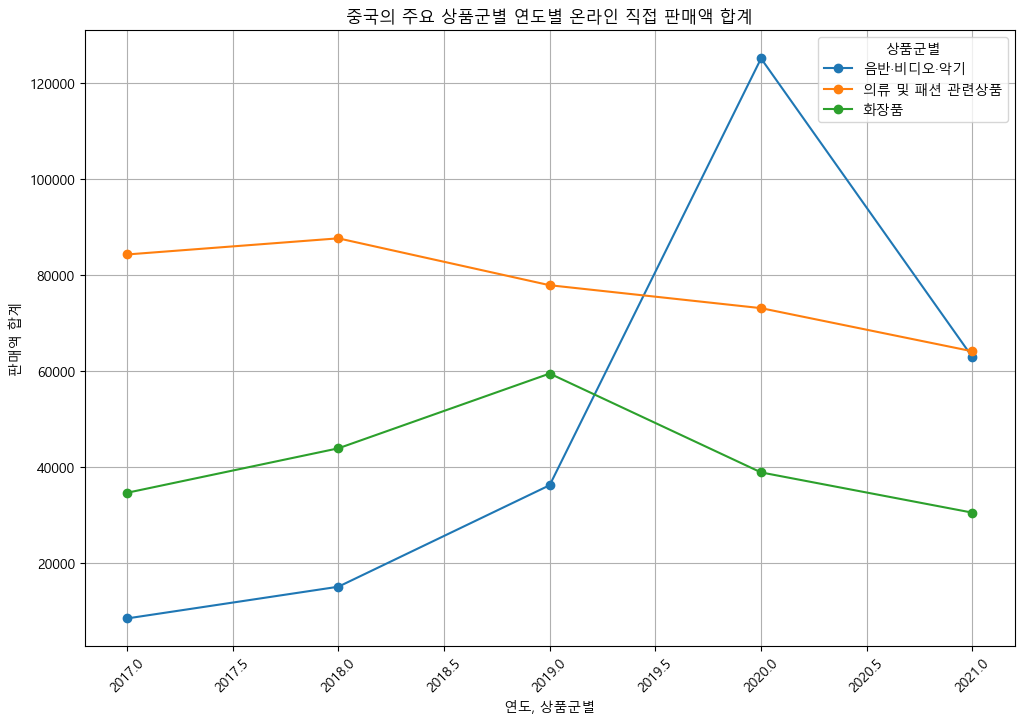

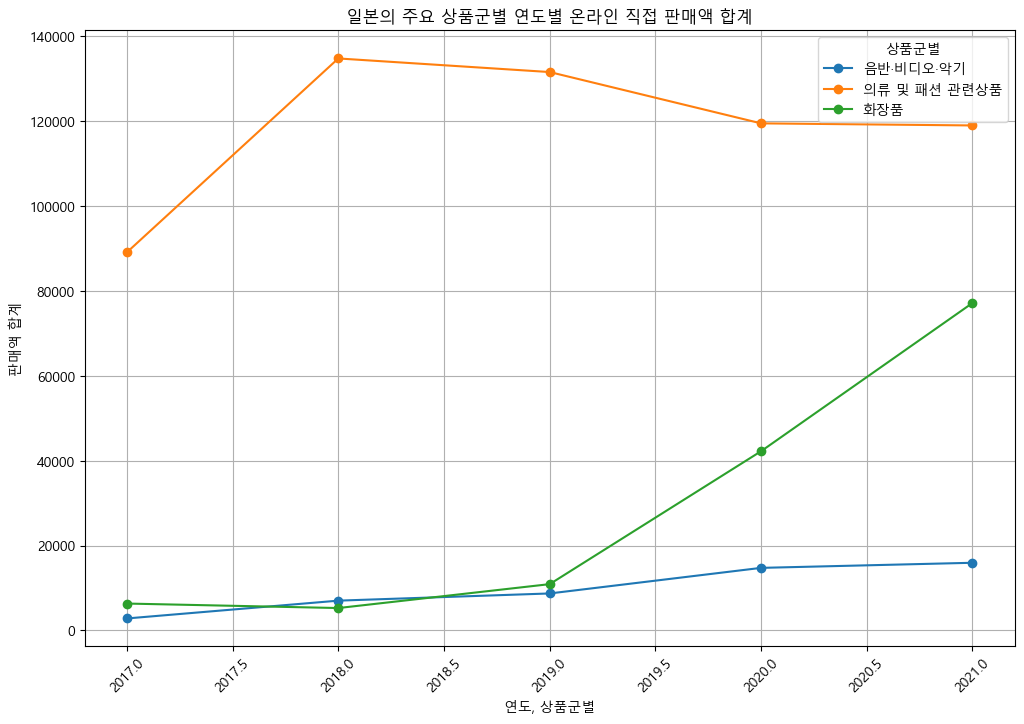

In [176]:
for country in important_countries:
    data_country = grouped_data.xs(country, level='국가(대륙)별', axis=0)
    data_country.plot(kind='line', marker='o', figsize=(12, 8))

    plt.title(f'{country}의 주요 상품군별 연도별 온라인 직접 판매액 합계')
    plt.xlabel('연도, 상품군별')
    plt.ylabel('판매액 합계')
    plt.legend(title='상품군별', bbox_to_anchor=(1, 1), loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()

### Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

In [162]:
population = pd.read_csv('인구밀도_인구주택총조사기준__20231031193509.csv')

In [163]:
population.head()

,행정구역별,2020,2021,2022
0,전국,516.20,515.20,514.60
1,서울특별시,15839.00,15650.10,15560.70
2,부산광역시,4348.90,4316.40,4272.80
3,대구광역시,2728.60,2702.20,2673.70
4,인천광역시,2765.10,2772.80,2801.30


In [167]:
print(population.columns)

Index(['행정구역별', '2020', '2021', '2022'], dtype='object')


In [172]:
population_melted = population.melt(id_vars=['행정구역별'], var_name='연도', value_name='인구밀도')

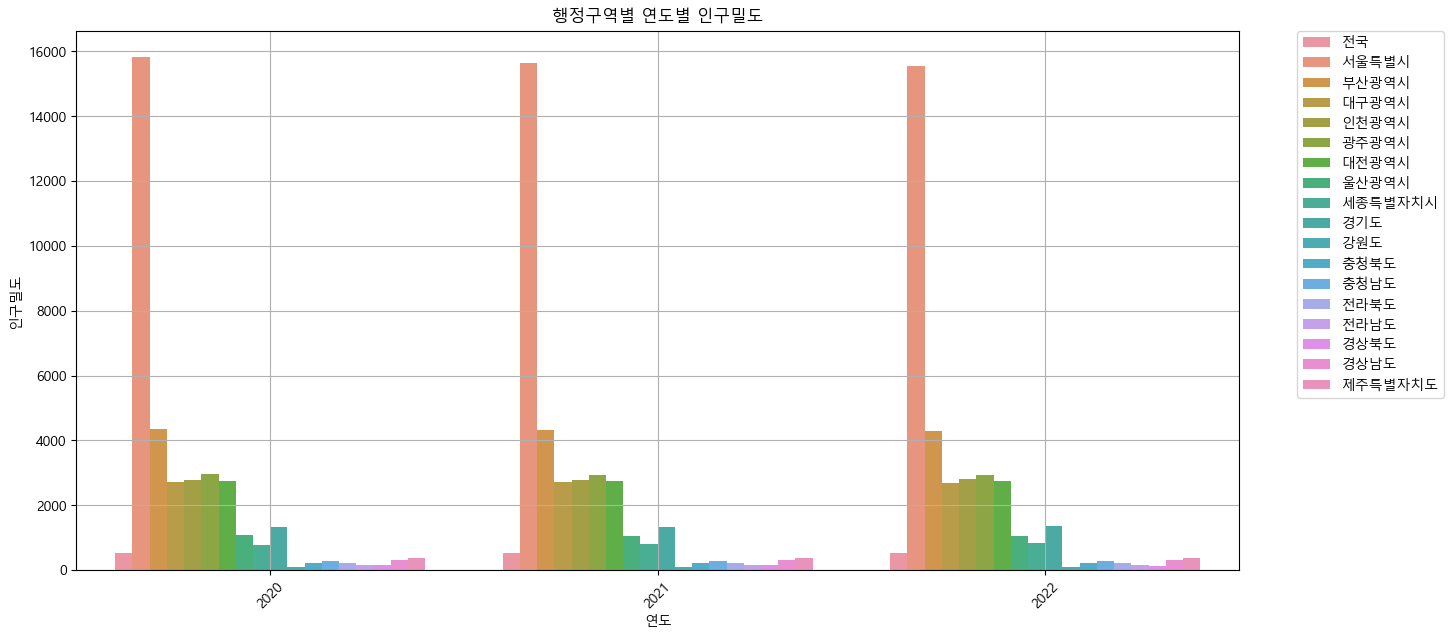

In [175]:
plt.figure(figsize=(15, 7))
sns.barplot(data=population_melted, x='연도', y='인구밀도', hue='행정구역별')

plt.title('행정구역별 연도별 인구밀도')
plt.xlabel('연도')
plt.ylabel('인구밀도')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()